In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# read the file

In [4]:
dataset= pd.read_csv('Fish_dataset.csv')
dataset.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
dataset.tail(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [6]:
# check the info

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [8]:
dataset.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [9]:
# weight is a target column 

In [10]:
col_to_use=['Species','Length1','Length2','Length3','Height','Width','Weight']
df1=dataset[col_to_use]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Length1  159 non-null    float64
 2   Length2  159 non-null    float64
 3   Length3  159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
 6   Weight   159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# handling missing value 

In [11]:
df1.isnull().sum()

Species    0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
Weight     0
dtype: int64

In [12]:
dataset.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [13]:
df1.corr()

,Length1,Length2,Length3,Height,Width,Weight
Length1,1.000000,0.999517,0.992031,0.625378,0.867050,0.915712
Length2,0.999517,1.000000,0.994103,0.640441,0.873547,0.918618
Length3,0.992031,0.994103,1.000000,0.703409,0.878520,0.923044
Height,0.625378,0.640441,0.703409,1.000000,0.792881,0.724345
Width,0.867050,0.873547,0.878520,0.792881,1.000000,0.886507
Weight,0.915712,0.918618,0.923044,0.724345,0.886507,1.000000


# finding the outliers

In [14]:
for cols in df1.columns[:-1]:
    if df1[cols].dtype == object:
        continue
    else:
        Q1 = df1[cols].quantile(q=0.25)
        Q3 = df1[cols].quantile(q=0.75)
        iqr = Q3 - Q1
    
        low = Q1 - 1.5*(Q3-Q1)
        high = Q3 + 1.5*(Q3-Q1)
        df1.loc[(df1[cols]<low) | (df1[cols]>high),cols] = df1[cols].median()

<AxesSubplot:xlabel='Width'>

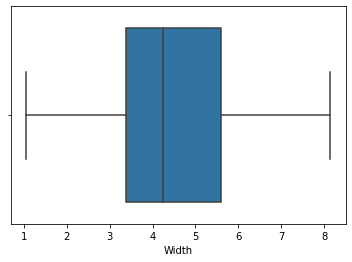

In [15]:
sns.boxplot(x='Width',data=df1)

In [18]:
df2=pd.get_dummies(df1['Species'])
df2.head(5)

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [20]:
df3=df1.drop('Species',axis=1)
df3.head(5)

,Length1,Length2,Length3,Height,Width,Weight
0,23.2,25.4,30.0,11.5200,4.0200,242.0
1,24.0,26.3,31.2,12.4800,4.3056,290.0
2,23.9,26.5,31.1,12.3778,4.6961,340.0
3,26.3,29.0,33.5,12.7300,4.4555,363.0
4,26.5,29.0,34.0,12.4440,5.1340,430.0


df4=pd.concat([df3,df2],axis=1)
df4

In [22]:
df4.shape

(159, 13)

# statistical visualisation

In [24]:
df1.describe()

,Length1,Length2,Length3,Height,Width,Weight
count,159.00000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,25.64717,27.777358,30.984277,8.970994,4.417486,398.326415
std,9.03285,9.699464,11.233925,4.286208,1.685804,357.978317
min,7.50000,8.400000,8.800000,1.728400,1.047600,0.000000
25%,19.05000,21.000000,23.150000,5.944800,3.385650,120.000000
50%,25.20000,27.300000,29.400000,7.786000,4.248500,273.000000
75%,32.00000,35.000000,39.550000,12.365900,5.584500,650.000000
max,52.00000,56.000000,64.000000,18.957000,8.142000,1650.000000


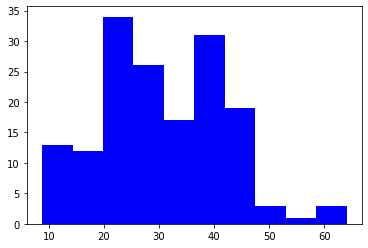

In [26]:
plt.hist(df4['Length3'], color='blue');

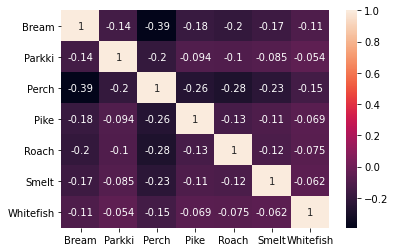

In [31]:
sns.heatmap(df2.corr(),annot=True);

# Machine Learning steps-

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [55]:
x=df4.drop('Weight',axis=1)
y=df4['Weight']

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(x)

In [62]:
# choose multiple linear reression

In [57]:
# convert data into test and train
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
mlr=LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [61]:
mlr.score(x_train, y_train)

0.9383112908990828

In [59]:
mlr.score(x_test, y_test)

0.9149855299275027

In [ ]:
# shows the generlised model.